Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

Loading Data set

In [2]:
file = "Iris.csv"
df = pd.read_csv(file)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Input features and target

In [3]:
x_train = df['PetalLengthCm'].values # input feature
y_train = df['SepalLengthCm'].values # target

Model

In [4]:
def f_wb(x,w,b):  # hypothesis
    return w*x + b

Computing Cost

In [5]:
def compute_cost(x,y,w,b):
    
    m = x.shape[0]  # numer of training examples
    total_cost =- 0
    
    for i in range(m):
        error =  f_wb(x[i],w,b) - y[i]
        total_cost += error**2
        
    total_cost /= (2*m)
    
    return total_cost

Computing gradient

In [6]:
def compute_gradient(x,y,w,b):
    
    m = x.shape[0]
    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):
        errror_for_g = f_wb(x[i],w,b) - y[i]
        
        dj_dw += errror_for_g * x[i]
        dj_db += errror_for_g
        
    dj_dw /= m
    dj_db /= m
    
    return dj_dw,dj_db

Gradient Decent

In [7]:
def gradient_decent(x,y,w,b,alpha,iteration):
    
    cost_history = []
    
    for i in range(iteration):
        
        dj_dw ,dj_db = compute_gradient(x,y,w,b)
        
        w = w- alpha*dj_dw
        b = b - alpha*dj_db
        
        cost = compute_cost(x,y,w,b)
        cost_history.append(cost)
        
        if i % 500 == 0:
            plt.scatter(x,y,color='blue',label="Training Data")
            
            x_line = np.array([min(x), max(x)])
            y_line = w*x_line + b
            plt.plot(x_line, y_line, color='red')
            
            plt.xlabel('Sepal Length')
            plt.ylabel('Petal Length')
            plt.title(f'Linear Regression: y = {w:.3f}x + {b:.3f}, cost = {cost:.3f}')

            plt.legend()
            plt.show()
            
    return w,b,cost_history

Training Model

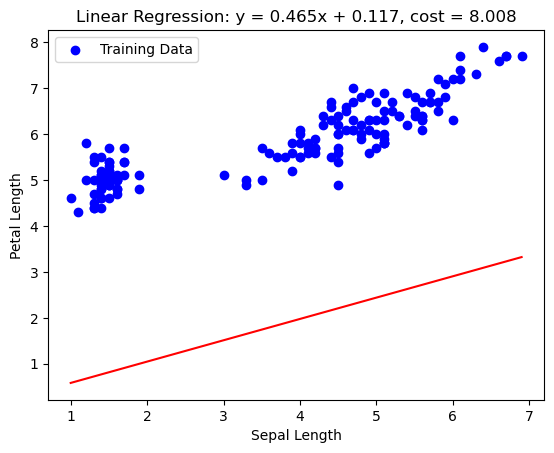

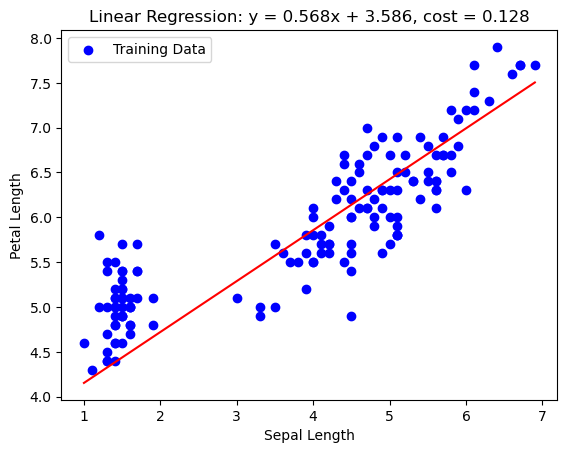

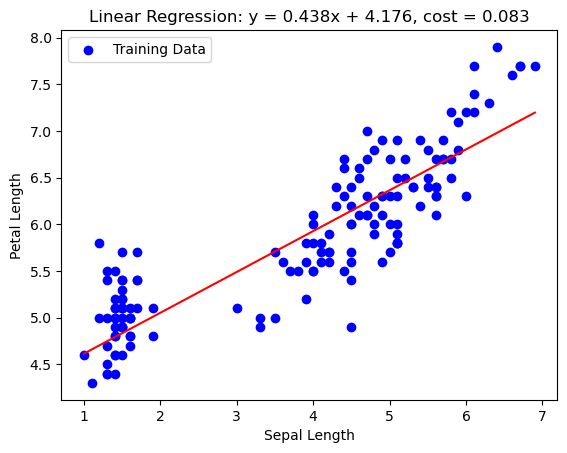

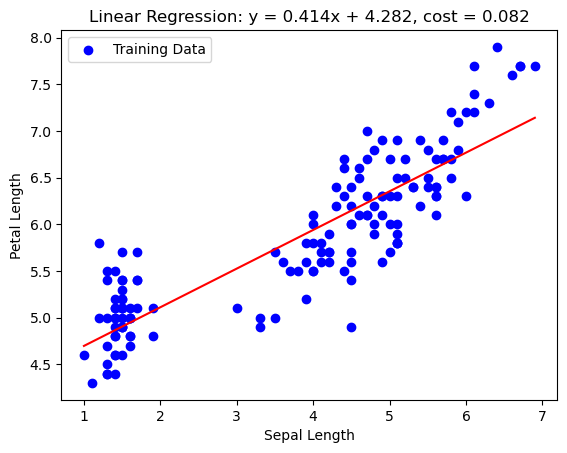

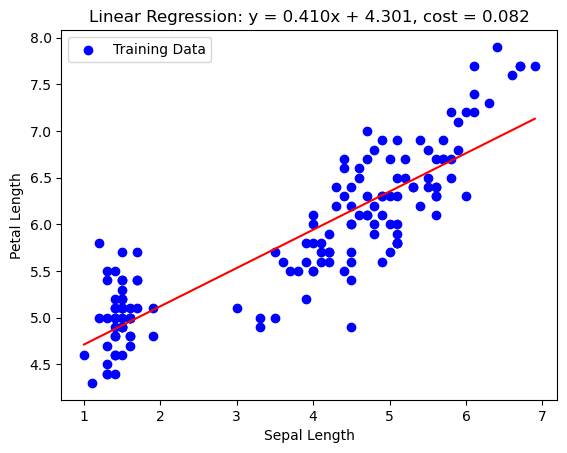

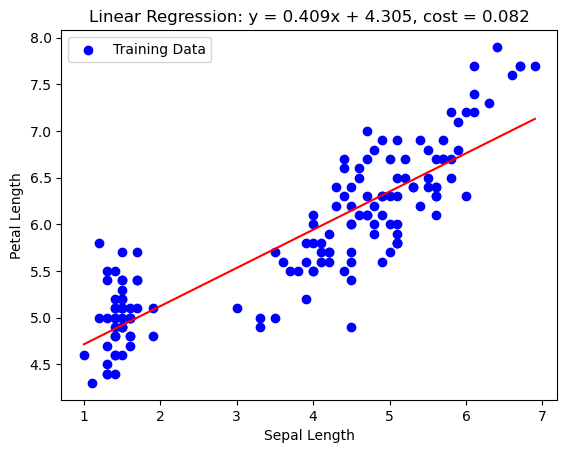

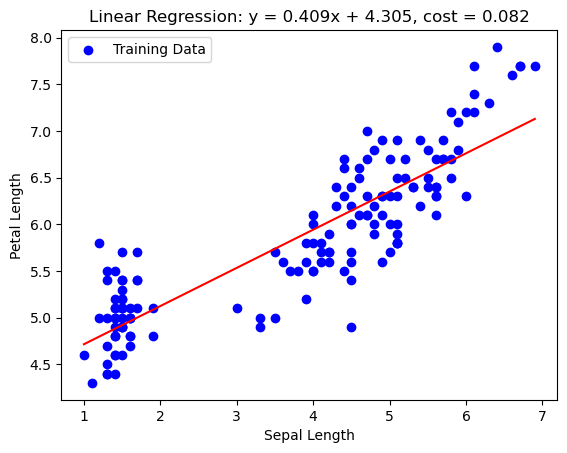

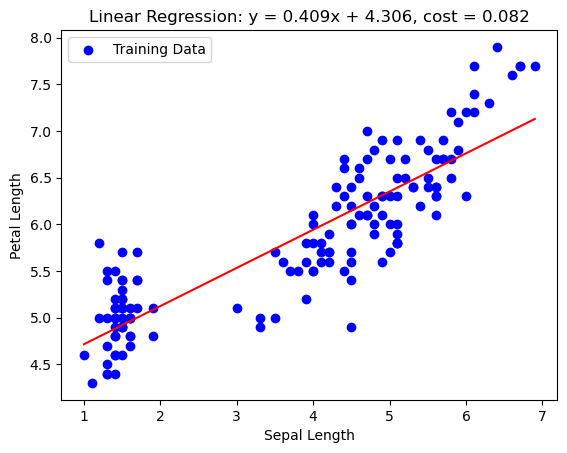

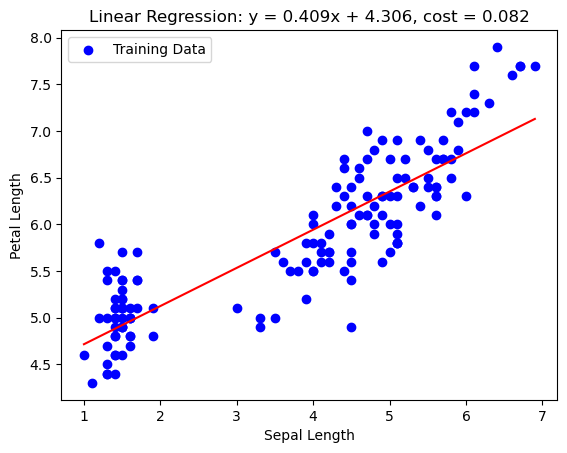

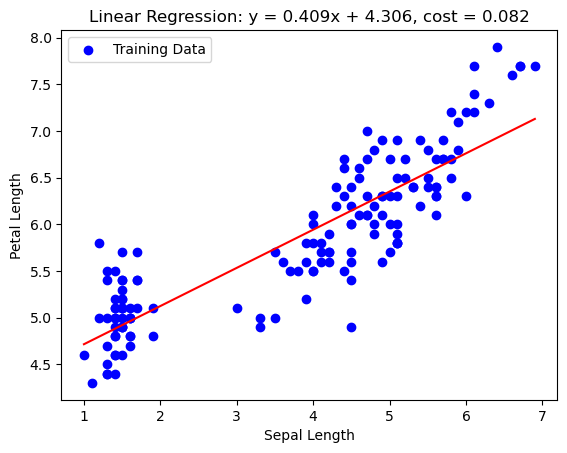

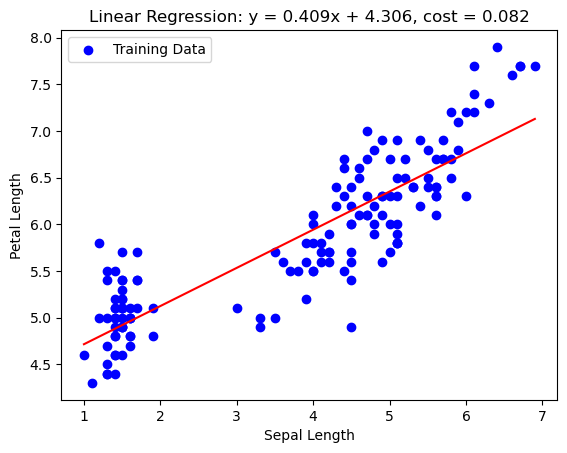

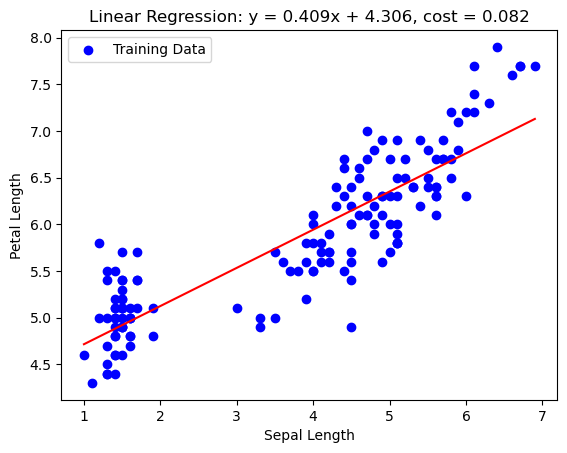

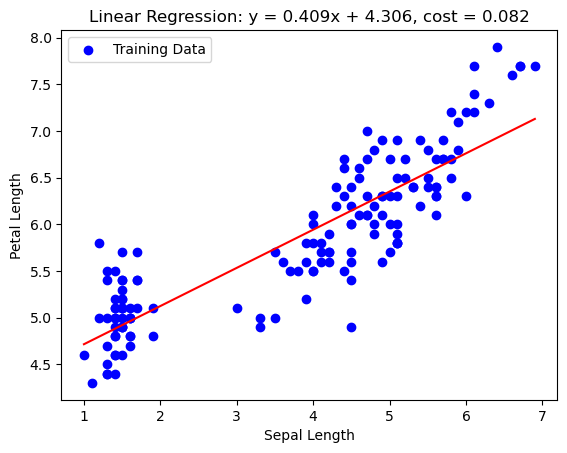

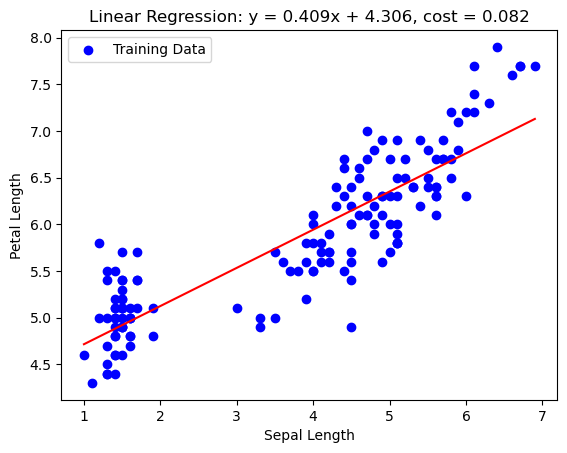

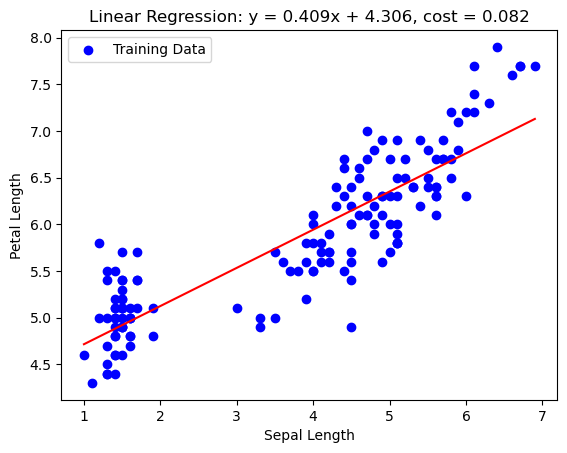

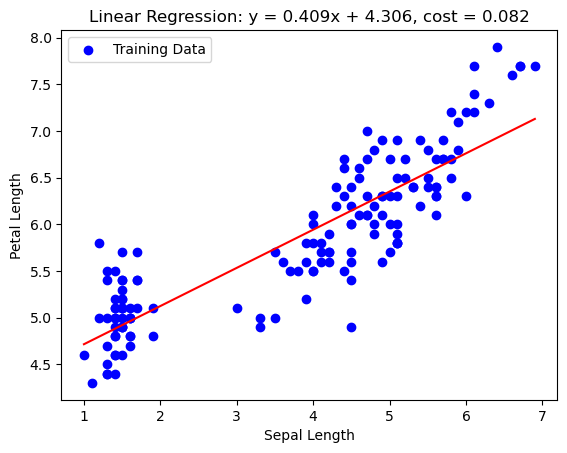

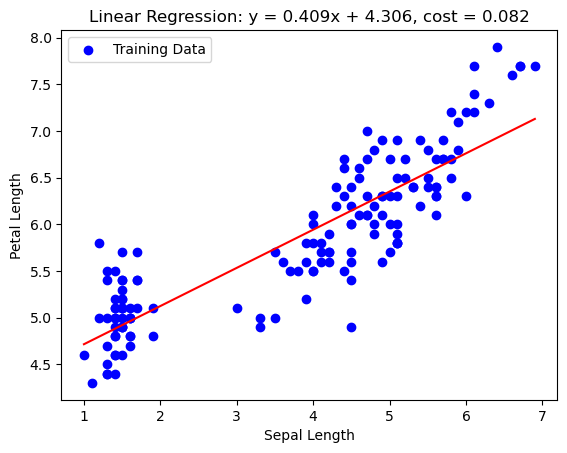

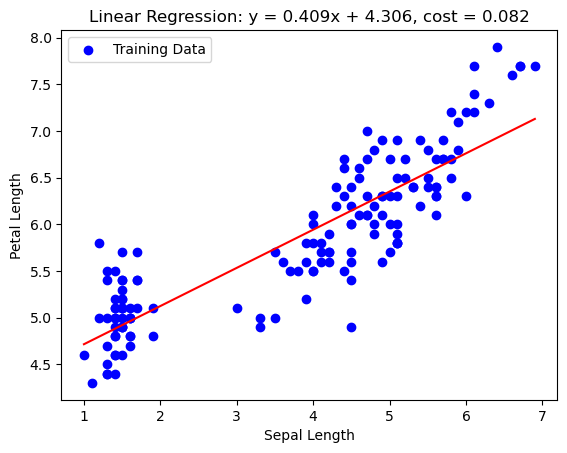

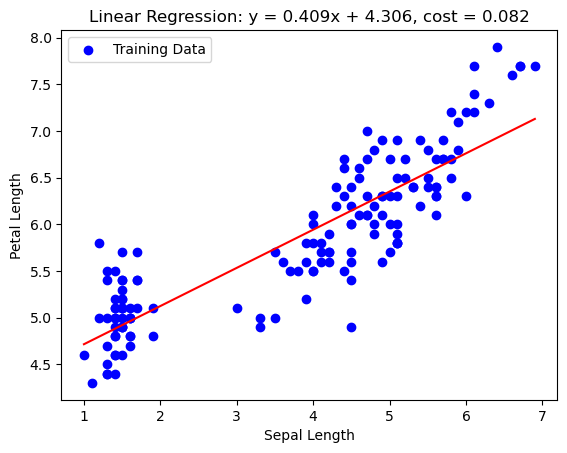

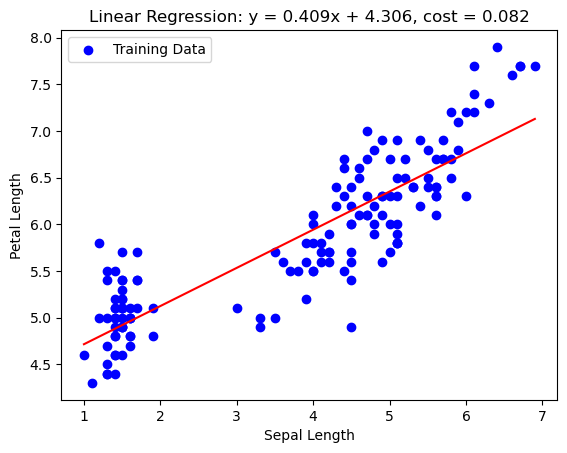

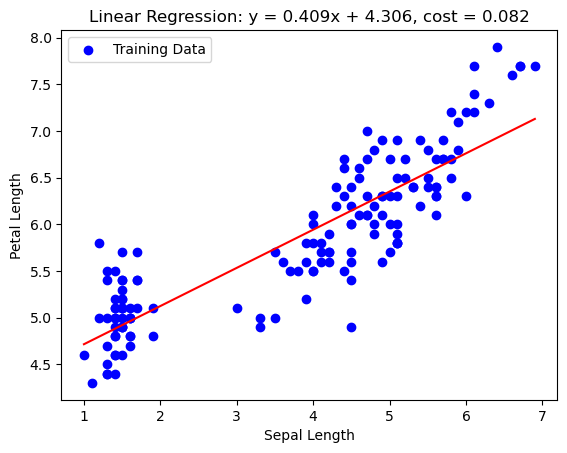

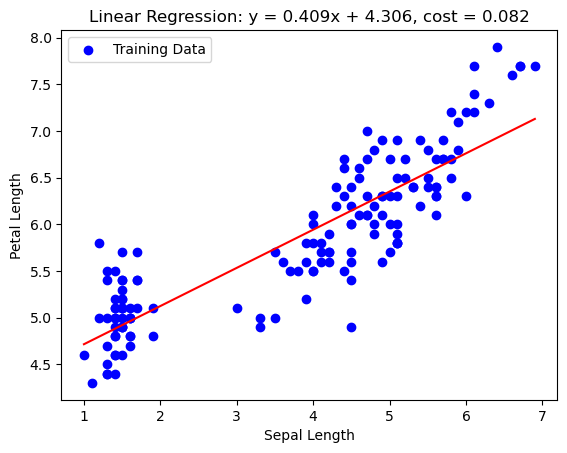

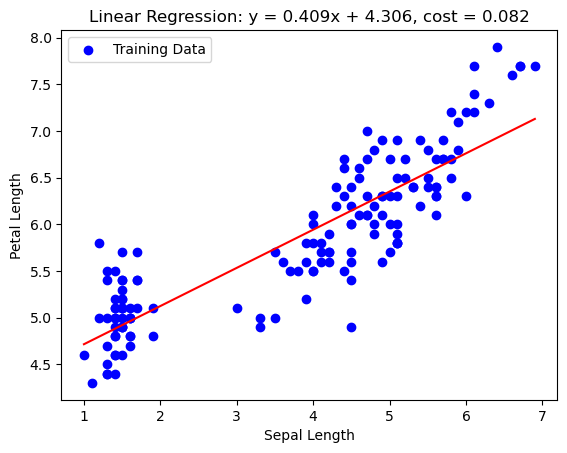

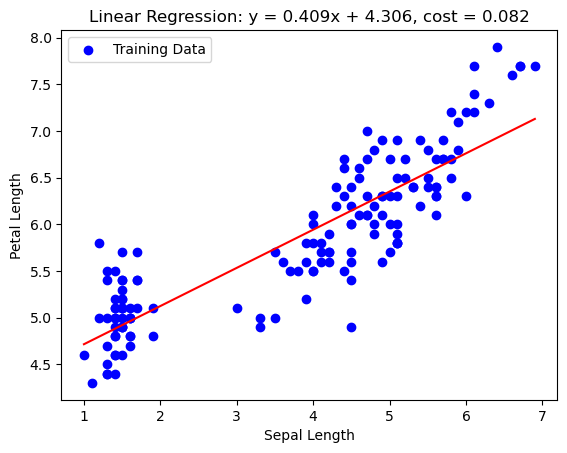

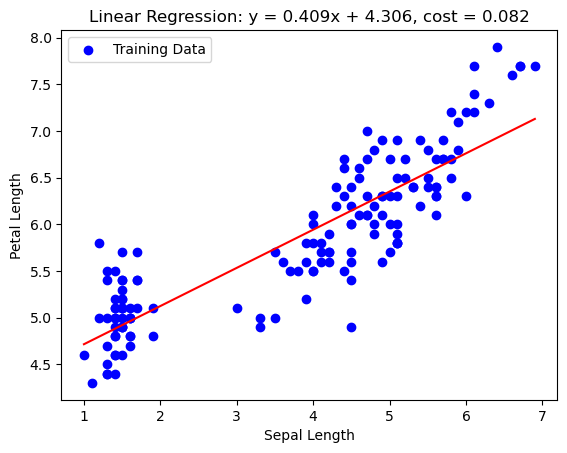

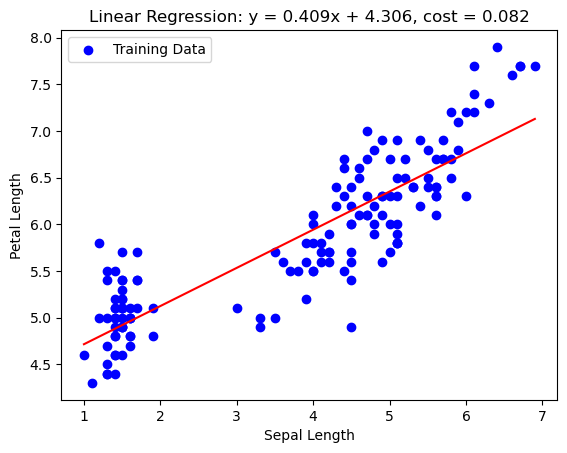

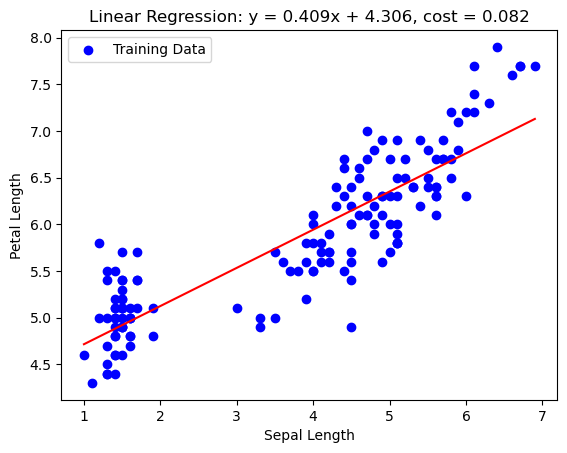

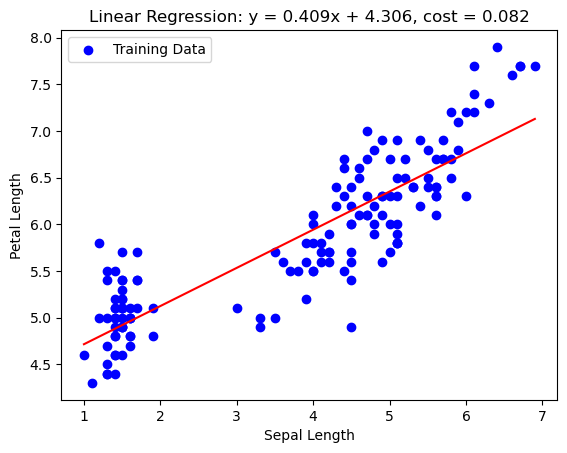

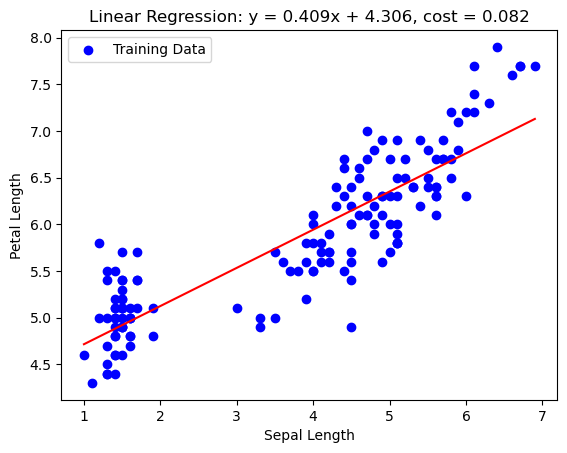

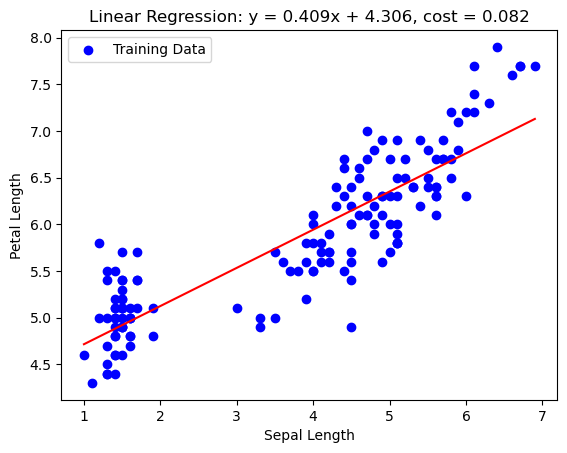

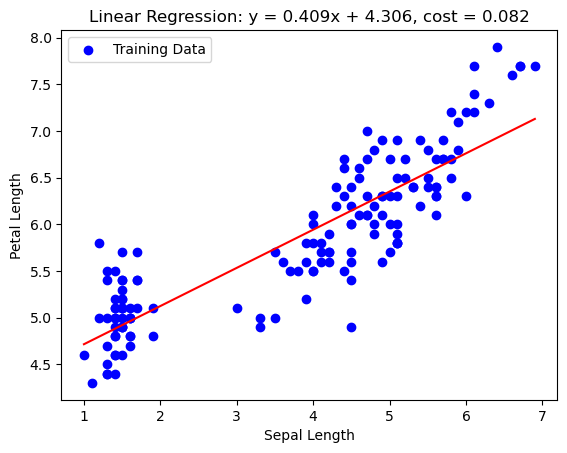

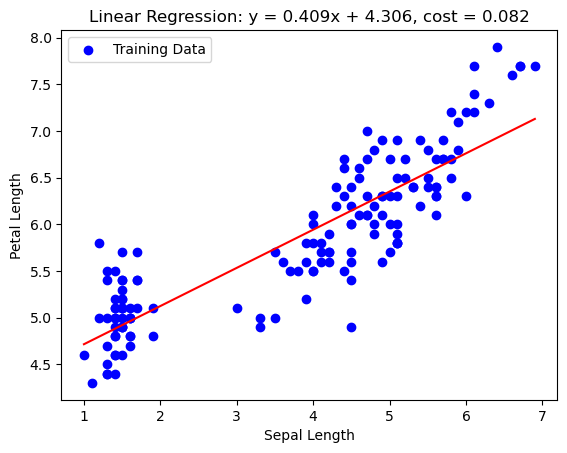

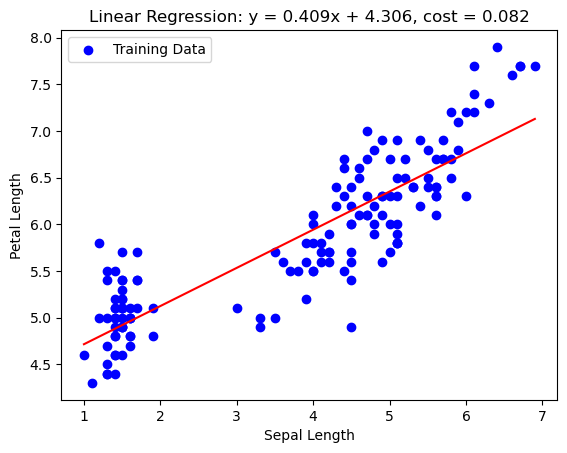

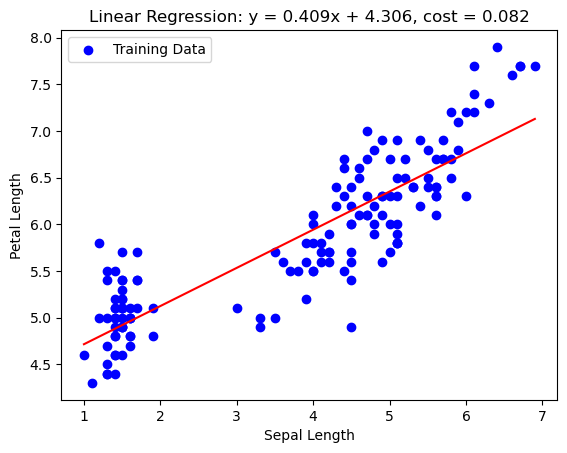

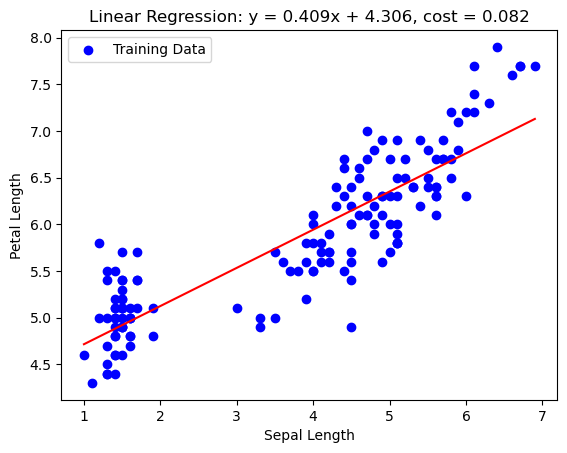

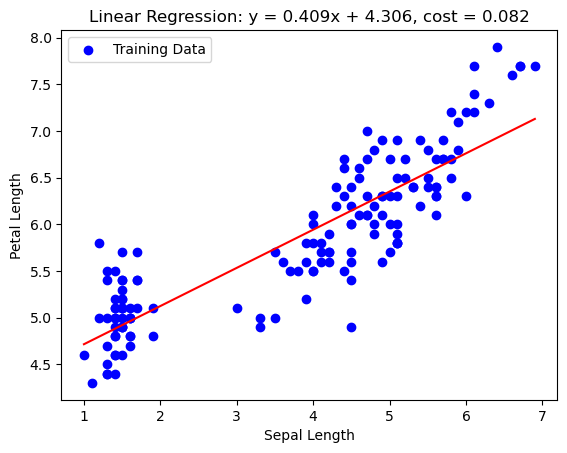

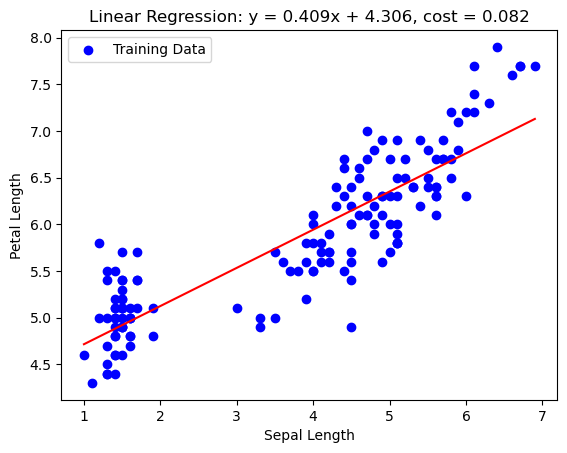

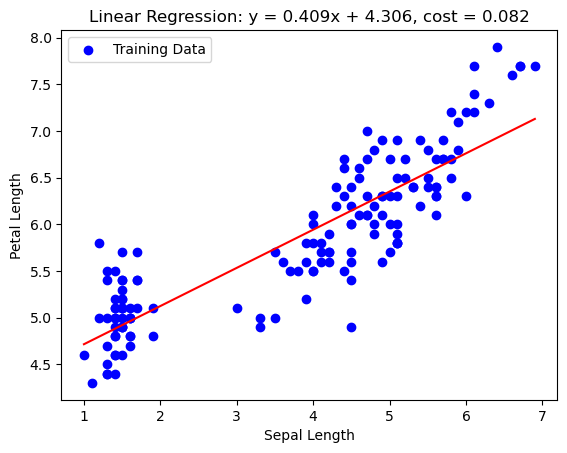

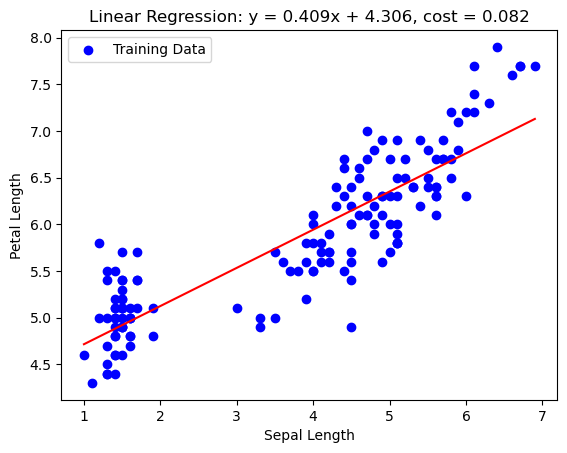

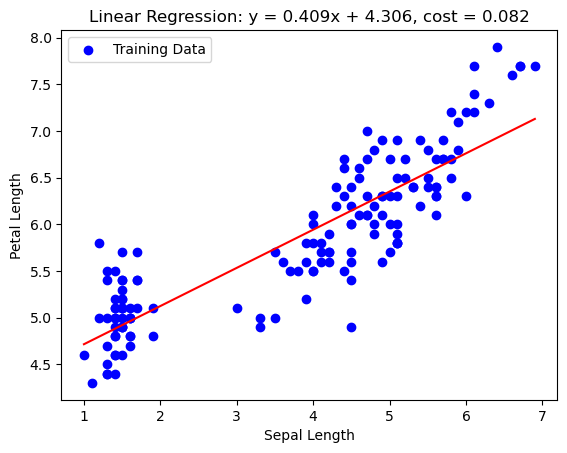

In [8]:
w_init = 0
b_init = 0

alpha = 0.02
iteration = 20000

w_final,b_final,cost_history = gradient_decent(x_train,y_train,w_init,b_init,alpha,iteration)

Cost Vs Itrations

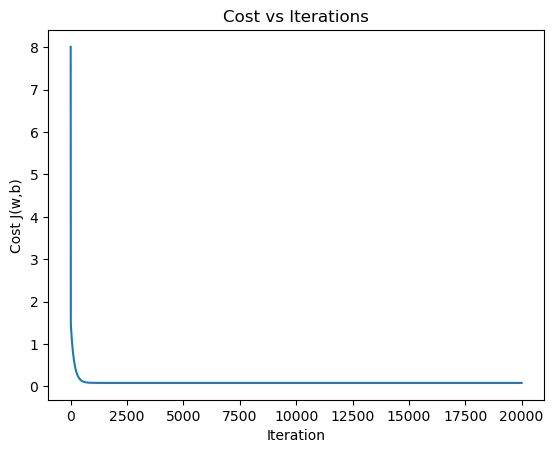

In [9]:
plt.figure()
plt.plot(cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost J(w,b)")
plt.title("Cost vs Iterations")
plt.show()

Comparing Solution using sklearn Library

In [10]:
model = LinearRegression()
model.fit(x_train.reshape(-1,1), y_train)

w_sklearn = model.coef_[0]  # slope
b_sklearn = model.intercept_  # intercept

print("\nSklearn model parameters:")
print("w =", w_sklearn)
print("b =", b_sklearn)

print("My model parameters:")
print("w_final =", w_final)
print("b_final =", b_final)


Sklearn model parameters:
w = 0.4091258984678832
b = 4.30556545629205
My model parameters:
w_final = 0.4091258984679106
b_final = 4.305565456291925
